# Analisis de datos de Runtastic
En este Notebook lo que haremos será procesar los datos descargados desde Runtastic, sacaremos los datos relevantes para nosotros y haremos unos graficos kawaii.

Primero, los import necesarios:

In [1]:
import os,json
import pandas as pd
import matplotlib.pyplot as plt

Luego, extraemos los datos necesarios de los archivos json. En la carpeta "Sport-sessions" estan TODAS las actividades, 1 archivo json por cada una. Ya que nos interesan las actividades que registran kilometraje, sacaremos algunas, como la 77, la 74, la 27 y la 31. Las actividades a "eliminar" se deben ir viendo caso a caso.

In [2]:
path_to_json = '/Users/nb-juanolivares/Documents/workspace/Runtastic_Analysis/export-20210106-000/Sport-sessions/'

df = pd.DataFrame()
lista_ano=[]
lista_mes=[]
lista_fecha=[]
lista_distancia=[]
lista_duracion=[]
lista_velocidad=[]
lista_ritmo=[]
lista_deporte=[]
dict_Deportes={'1':'Running','3':'Cycling','4':'MTB','14':'Treadmill','22':'Race Cycling','15':'Ergometer','16':'Elliptical','17':'Rowing','19':'Walking','5':'Other'}
dict_Meses={'01':'Enero','02':'Febrero','03':'Marzo','04':'Abril','05':'Mayo','06':'Junio','07':'Julio','08':'Agosto','09':'Septiembre','10':'Octubre','11':'Noviembre','12':'Diciembre'}
for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
  with open(path_to_json + file_name) as json_file:
    data = json.load(json_file)
    # quitamos los tipos de deportes que no acumulan kms, por lo tanto no nos interesan.
    # 77: Sixpack, 74: Gymnastics, 27: Aerobics, 31: Pilates
    if data['sport_type_id'] != '77' and data['sport_type_id'] != '74' and data['sport_type_id'] != '27' and data['sport_type_id'] != '31':
        #print('Processing '+file_name)
        lista_ano.append(file_name[0:4])
        lista_mes.append(file_name[5:7])
        lista_fecha.append(file_name[0:10])
        lista_distancia.append(float(data['distance'])/1000) # lo dividimos por 1000 para reprentarlos en Km
        lista_duracion.append((float(data['duration'])/60000)) # esta en milisegundos, lo dividimos por 60m para que quede en minutos
        lista_velocidad.append(data['average_speed'])
        lista_ritmo.append((float(data['duration'])/60)/float(data['distance']))
        lista_deporte.append(dict_Deportes.get(data['sport_type_id']))

df['Año']=lista_ano
df['Mes']=lista_mes
df['Fecha']=lista_fecha
df['Distancia (km)']=lista_distancia
df['Duracion (min)']=lista_duracion
df['Velocidad Promedio (km/h)']=lista_velocidad
df['Ritmo (min/km)']=lista_ritmo
df['Deporte']=lista_deporte

Y listo, ahora tenemos un lindo Pandas DataFrame para jugar.

In [3]:
df.head()

,Año,Mes,Fecha,Distancia (km),Duracion (min),Velocidad Promedio (km/h),Ritmo (min/km),Deporte
0,2016,01,2016-01-13,5.99,36.950100,9.726587,6.168631,Running
1,2019,05,2019-05-01,7.50,42.083333,10.693069,5.611111,Treadmill
2,2016,04,2016-04-22,4.00,24.250000,9.896907,6.062500,Treadmill
3,2018,04,2018-04-20,5.25,30.450000,10.344827,5.800000,Treadmill
4,2018,12,2018-12-01,5.00,24.916667,12.040133,4.983333,Rowing


Que tal si ploteamos el total de KM por año, por deporte:

In [4]:
df_plot=df.groupby(['Año', 'Deporte'])['Distancia (km)'].sum().unstack('Deporte').fillna(0)
df_plot

Deporte,Cycling,Elliptical,Ergometer,MTB,Other,Race Cycling,Rowing,Running,Treadmill,Walking
Año,,,,,,,,,,
2012,761.004,0.00,0.00,0.000,0.000,0.000,0.00,179.083,0.00,0.000
2013,259.021,0.00,0.00,173.288,0.000,0.000,0.00,32.593,0.00,0.000
2014,0.000,0.00,0.00,291.434,0.000,0.000,74.10,145.533,103.60,16.966
2015,0.000,0.00,8.00,676.181,30.128,155.636,139.05,529.757,446.09,5.947
2016,0.000,0.00,0.00,388.470,0.000,591.474,129.51,642.082,358.18,36.865
2017,0.000,82.10,0.00,174.333,0.000,240.263,71.00,591.623,412.69,6.836
2018,0.000,13.87,41.28,238.750,0.000,117.781,146.80,473.176,590.45,29.493
2019,0.000,0.00,363.29,30.609,0.000,418.601,34.91,276.214,819.92,0.000
2020,0.000,0.00,81.81,427.831,0.000,306.326,0.00,96.747,1264.12,30.126


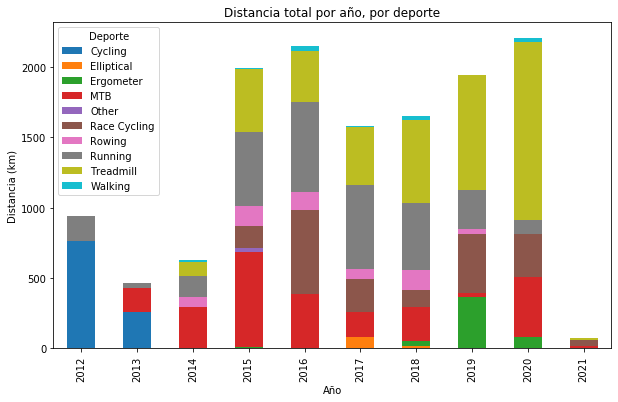

In [5]:
df_plot.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Año') # add to x-label to the plot
plt.ylabel('Distancia (km)') # add y-label to the plot
plt.title('Distancia total por año, por deporte') # add title to the plot

plt.show()

## Filtrar por tipo de deporte
Aca filtramos dependiendo del tipo de deporte que queremos analizar:
- 1 para Running
- 14 para Treadmill
- 4 para MTB
- 22 para Race Cycling

In [6]:
# OK, dejemos solo el tipo que nos interesa (o los tipos que nos interesan)
df_filtrado=df.query('Deporte == "Running" or Deporte == "Treadmill" or Deporte == "MTB" or Deporte == "Race Cycling"')
df_filtrado=df_filtrado.sort_values(by='Fecha').reset_index(drop=True)
df_filtrado

,Año,Mes,Fecha,Distancia (km),Duracion (min),Velocidad Promedio (km/h),Ritmo (min/km),Deporte
0,2012,04,2012-04-13,4.300,28.515483,9.048000,6.631508,Running
1,2012,04,2012-04-25,5.182,32.702550,9.508000,6.310797,Running
2,2012,04,2012-04-26,5.206,32.884633,9.499000,6.316679,Running
3,2012,04,2012-04-29,5.029,30.166433,10.003000,5.998495,Running
4,2012,05,2012-05-01,5.023,31.792067,9.480000,6.329299,Running
...,...,...,...,...,...,...,...,...
1340,2021,01,2021-01-01,20.393,52.733533,23.203634,2.585864,Race Cycling
1341,2021,01,2021-01-03,26.909,74.750050,21.598845,2.777883,Race Cycling
1342,2021,01,2021-01-04,7.000,38.450000,10.923277,5.492857,Treadmill
1343,2021,01,2021-01-05,5.000,27.983333,10.720667,5.596667,Treadmill


### Velocidad (km/h) promedio al año

In [7]:
df_plot=df_filtrado.groupby(['Año', 'Deporte'])['Velocidad Promedio (km/h)'].mean().unstack('Deporte').fillna(0)
df_plot

Deporte,MTB,Race Cycling,Running,Treadmill
Año,,,,
2012,0.000000,0.000000,9.574967,0.000000
2013,15.927000,0.000000,10.887500,0.000000
2014,20.266556,0.000000,9.495824,9.554400
2015,17.867335,21.035734,9.682156,10.068491
2016,13.243350,23.474720,9.447197,9.900486
2017,12.617767,23.232105,9.858072,10.181705
2018,13.636411,21.328716,9.977214,10.316681
2019,15.495005,21.786187,10.379210,10.697674
2020,14.303456,22.520653,10.060769,10.632407


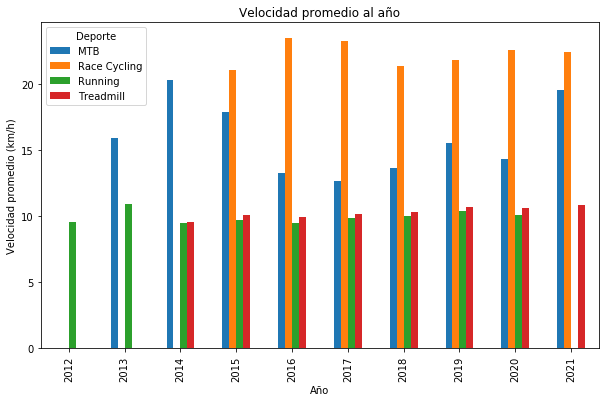

In [8]:
df_plot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Año') # add to x-label to the plot
plt.ylabel('Velocidad promedio (km/h)') # add y-label to the plot
plt.title('Velocidad promedio al año') # add title to the plot

plt.show()

### Ritmo (min/km) promedio al año

In [9]:
df_plot=df_filtrado.groupby(['Año', 'Deporte'])['Ritmo (min/km)'].mean().unstack('Deporte').fillna(0)
df_plot

Deporte,MTB,Race Cycling,Running,Treadmill
Año,,,,
2012,0.000000,0.000000,6.458480,0.000000
2013,4.699091,0.000000,5.548362,0.000000
2014,2.971846,0.000000,6.432451,6.285561
2015,3.517244,2.886941,8.331034,5.963720
2016,4.800656,2.580927,6.425448,11.814247
2017,5.383499,2.719881,6.113085,5.894415
2018,4.930596,2.816525,6.038352,5.816854
2019,4.146823,2.774543,5.785261,5.610450
2020,4.612053,2.671048,5.985553,5.644566


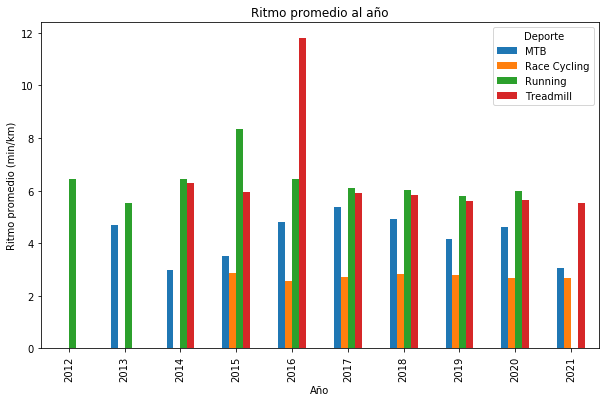

In [10]:
df_plot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Año') # add to x-label to the plot
plt.ylabel('Ritmo promedio (min/km)') # add y-label to the plot
plt.title('Ritmo promedio al año') # add title to the plot

plt.show()

### Distancia (km) promedio al año

In [11]:
df_plot=df_filtrado.groupby(['Año', 'Deporte'])['Distancia (km)'].mean().unstack('Deporte').fillna(0)
df_plot

Deporte,MTB,Race Cycling,Running,Treadmill
Año,,,,
2012,0.000000,0.000000,5.969433,0.000000
2013,34.657600,0.000000,8.148250,0.000000
2014,32.381556,0.000000,8.560765,5.180000
2015,28.174208,22.233714,7.567957,5.869605
2016,21.581667,28.165429,6.294922,5.685397
2017,13.410231,21.842091,5.634505,5.158625
2018,17.053571,23.556200,5.914700,5.367727
2019,15.304500,24.623588,6.138089,7.068276
2020,12.223743,21.880429,6.046688,5.991090


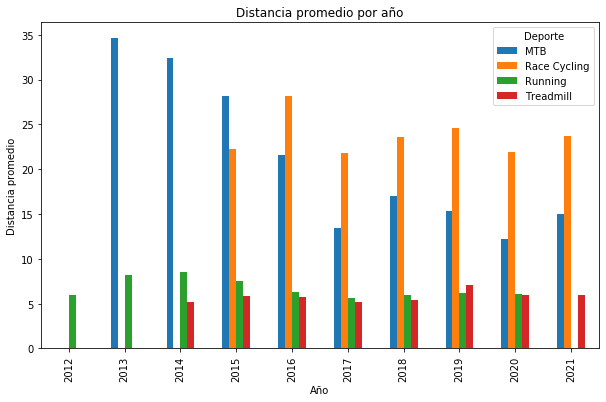

In [12]:
df_plot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Año') # add to x-label to the plot
plt.ylabel('Distancia promedio') # add y-label to the plot
plt.title('Distancia promedio por año') # add title to the plot

plt.show()

### Duracion (minutos) promedio al año

In [13]:
df_plot=df_filtrado.groupby(['Año', 'Deporte'])['Duracion (min)'].mean().unstack('Deporte').fillna(0)
df_plot

Deporte,MTB,Race Cycling,Running,Treadmill
Año,,,,
2012,0.000000,0.000000,37.077386,0.000000
2013,129.577497,0.000000,44.988058,0.000000
2014,97.427606,0.000000,54.644647,32.501667
2015,94.237501,64.190526,46.732785,34.925658
2016,90.868704,71.120129,40.168795,61.667460
2017,60.108087,58.157117,34.452205,30.410417
2018,80.106701,66.363420,35.695327,31.216364
2019,61.046483,68.232130,35.492816,39.635057
2020,51.507672,58.958052,36.153626,33.830979


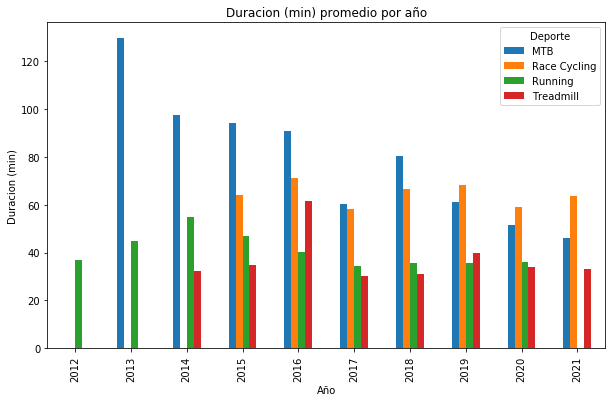

In [14]:
df_plot.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Año') # add to x-label to the plot
plt.ylabel('Duracion (min)') # add y-label to the plot
plt.title('Duracion (min) promedio por año') # add title to the plot

plt.show()

### Distancia total en km al año

In [15]:
df_plot=df_filtrado.groupby(['Año', 'Deporte'])['Distancia (km)'].sum().unstack('Deporte').fillna(0)
df_plot

Deporte,MTB,Race Cycling,Running,Treadmill
Año,,,,
2012,0.000,0.000,179.083,0.00
2013,173.288,0.000,32.593,0.00
2014,291.434,0.000,145.533,103.60
2015,676.181,155.636,529.757,446.09
2016,388.470,591.474,642.082,358.18
2017,174.333,240.263,591.623,412.69
2018,238.750,117.781,473.176,590.45
2019,30.609,418.601,276.214,819.92
2020,427.831,306.326,96.747,1264.12


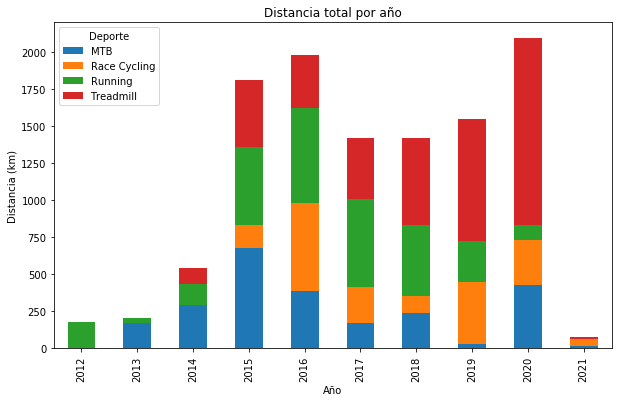

In [16]:
df_plot.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Año') # add to x-label to the plot
plt.ylabel('Distancia (km)') # add y-label to the plot
plt.title('Distancia total por año') # add title to the plot

plt.show()

### Numero de actividades (filtrada) al año

In [17]:
df_plot=df_filtrado.groupby(['Año', 'Deporte'])['Deporte'].count().unstack('Deporte').fillna(0)
df_plot

Deporte,MTB,Race Cycling,Running,Treadmill
Año,,,,
2012,0.0,0.0,30.0,0.0
2013,5.0,0.0,4.0,0.0
2014,9.0,0.0,17.0,20.0
2015,24.0,7.0,70.0,76.0
2016,18.0,21.0,102.0,63.0
2017,13.0,11.0,105.0,80.0
2018,14.0,5.0,80.0,110.0
2019,2.0,17.0,45.0,116.0
2020,35.0,14.0,16.0,211.0


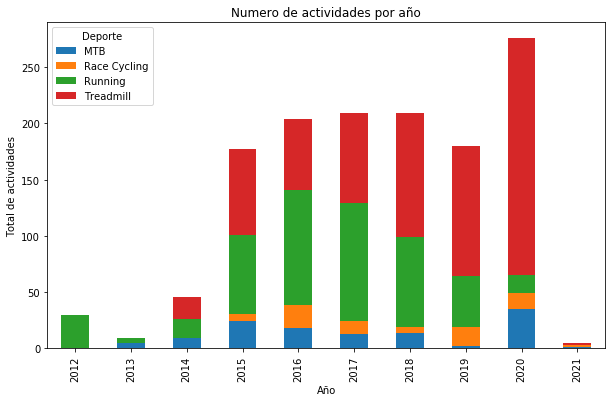

In [18]:
df_plot.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Año') # add to x-label to the plot
plt.ylabel('Total de actividades') # add y-label to the plot
plt.title('Numero de actividades por año') # add title to the plot

plt.show()

### Desglose por Año
Escojamos un año en particular y hagamos el mismo desglose anterior pero por mes

In [19]:
df_filtrado_ano=df.query('Año == "2020"')
df_filtrado_ano=df_filtrado_ano.sort_values(by='Fecha').reset_index(drop=True)
df_filtrado_ano

,Año,Mes,Fecha,Distancia (km),Duracion (min),Velocidad Promedio (km/h),Ritmo (min/km),Deporte
0,2020,01,2020-01-01,5.360,30.316667,10.608026,5.656095,Running
1,2020,01,2020-01-03,7.250,42.766667,10.171473,5.898851,Running
2,2020,01,2020-01-05,26.510,75.999417,20.929033,2.866821,Race Cycling
3,2020,01,2020-01-06,7.280,41.366667,10.559226,5.682234,Running
4,2020,01,2020-01-08,10.392,61.534200,10.132613,5.921305,MTB
...,...,...,...,...,...,...,...,...
293,2020,12,2020-12-27,25.033,70.116117,21.421736,2.800947,Race Cycling
294,2020,12,2020-12-28,5.400,30.000000,10.799999,5.555556,Treadmill
295,2020,12,2020-12-29,6.000,33.400000,10.778442,5.566667,Treadmill
296,2020,12,2020-12-30,7.000,38.583333,10.885530,5.511905,Treadmill


In [20]:
df_plot=df_filtrado_ano.groupby(['Mes', 'Deporte'])['Distancia (km)'].sum().unstack('Deporte').fillna(0)
df_plot.rename(index=dict_Meses, inplace=True)
df_plot

Deporte,Ergometer,MTB,Race Cycling,Running,Treadmill,Walking
Mes,,,,,,
Enero,10.98,100.544,43.913,25.350,44.00,0.000
Febrero,22.80,24.286,50.610,29.860,40.13,0.000
Marzo,18.03,24.592,40.644,5.560,91.57,4.689
Abril,0.00,0.000,0.000,0.000,154.64,0.000
Mayo,10.00,0.000,0.000,0.000,124.81,0.000
Junio,0.00,0.000,0.000,0.000,167.92,0.000
Julio,10.00,0.000,0.000,0.000,171.05,0.000
Agosto,10.00,9.953,0.000,0.000,134.81,11.179
Septiembre,0.00,61.542,28.833,0.000,97.66,2.790


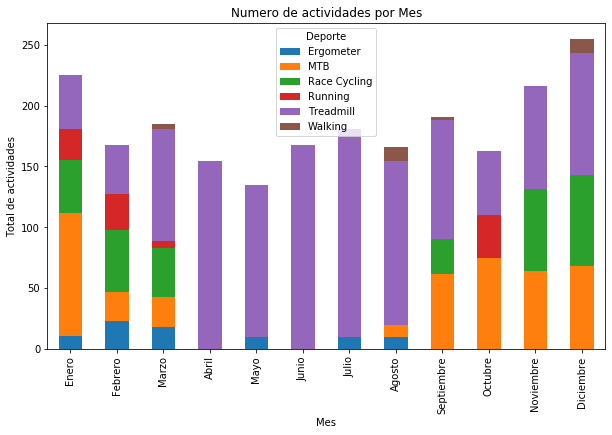

In [21]:
df_plot.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.xlabel('Mes') # add to x-label to the plot
plt.ylabel('Total de actividades') # add y-label to the plot
plt.title('Numero de actividades por Mes') # add title to the plot

plt.show()